In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import doralite
import gfdl_utils.core as gu
import CM4Xutils

In [4]:
model = "CM4Xp125"
exp = "historical"

In [5]:
def get_pp(model, exp):
    return doralite.dora_metadata(CM4Xutils.exp_dict[model][exp])['pathPP']

def open_CM4X(model, exp, ppname, time, add, **kwargs):
    pp = get_pp(model, exp)
    out = "ts"
    local = gu.get_local(pp, ppname, out)
    return gu.open_frompp(pp, ppname, out, local, time, add, **kwargs)

In [39]:
get_pp("CM4Xp25", "historical")

'/archive/Raphael.Dussin/FMS2019.01.03_devgfdl_20221223/CM4_historical_c192_OM4p25/gfdl.ncrc4-intel18-prod-openmp/pp/'

In [35]:
pi = open_CM4X("CM4Xp125", "piControl", "ocean_monthly", "*", "tos", dmget=True)
hi = open_CM4X("CM4Xp125", "historical", "ocean_monthly", "*", "tos", dmget=True)
si = open_CM4X("CM4Xp125", "ssp585", "ocean_monthly", "*", "tos", dmget=True)

Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.
Issuing dmget command to migrate data to disk. Migration complete.


In [36]:
fo = CM4Xutils.concat_scenarios([hi, si])

In [37]:
pi_u, fo_u = CM4Xutils.align_dates(pi, fo)

In [38]:
pi_u.time, fo.time

(<xarray.DataArray 'time' (time: 3000)> Size: 24kB
 array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
        ...,
        cftime.DatetimeNoLeap(2099, 10, 16, 12, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2099, 11, 16, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2099, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
       dtype=object)
 Coordinates:
   * time           (time) object 24kB 1850-01-16 12:00:00 ... 2099-12-16 12:0...
     time_original  (time) object 24kB 0101-01-16 12:00:00 ... 0350-12-16 12:0...
 Attributes:
     long_name:      time
     axis:           T
     calendar_type:  NOLEAP
     bounds:         time_bnds
     cell_methods:   time: mean,
 <xarray.DataArray 'time' (time: 3000)> Size: 24kB
 array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zer

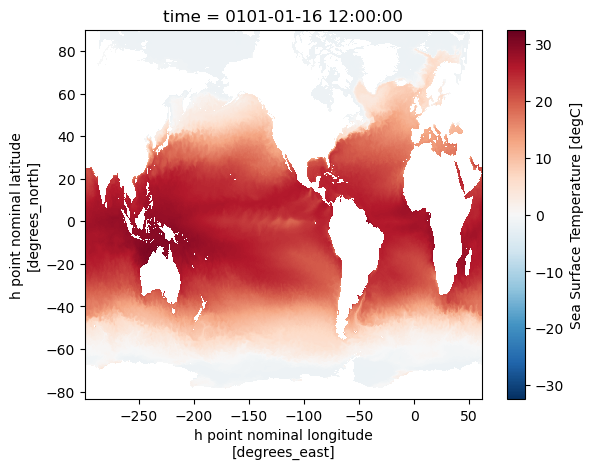

In [19]:
pi.isel(time=0)['tos'].plot()